In [22]:
import numpy as np
import pandas as pd
from functools import partial
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

In [72]:
# завантажимо датасет і зробимо розділення на навчальну валідаційну і тестову вибірки
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [73]:
# Побудуємо модель зготкової мережі трохи іншу від тогощо пропонували на заняттях
# використуємо для зручності функцію partial щоб в подальшому передавать тільки змінні параметри
from functools import partial

DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
# перший шар зробимо з великим ядром 7х7 щоб побудувати базові шари фільтрів, всюди будемо застосовувать padding='same' щоб не втрачати інформацію
# вже потім зменшимо зображення і застосуємо звичний пакет згорткових і зменшуючих шарів.
# в кінці добавимо пару повнозвязних шарів зі зменншенням кількості нейронів, і шар для класифікації. типово як рекомендують
# первіримо цю модель
model = keras.models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [74]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.6285 - loss: 1.0262 - val_accuracy: 0.8570 - val_loss: 0.3884
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8459 - loss: 0.4576 - val_accuracy: 0.8666 - val_loss: 0.3822
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8709 - loss: 0.3819 - val_accuracy: 0.8852 - val_loss: 0.3194
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8849 - loss: 0.3345 - val_accuracy: 0.8950 - val_loss: 0.2958
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8943 - loss: 0.3188 - val_accuracy: 0.8994 - val_loss: 0.2892
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9038 - loss: 0.2887 - val_accuracy: 0.9018 - val_loss: 0.2711
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9064 - loss: 0.2771 - val_accuracy: 0.9022 - val_loss: 0.2733
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9097 - loss: 0.2676 -

In [83]:
# подивимось чого досягнуто поточність та шо по втратам
score = model.evaluate(X_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8972 - loss: 0.3070
Test loss: 0.3080334961414337
Test accuracy: 0.8985000252723694


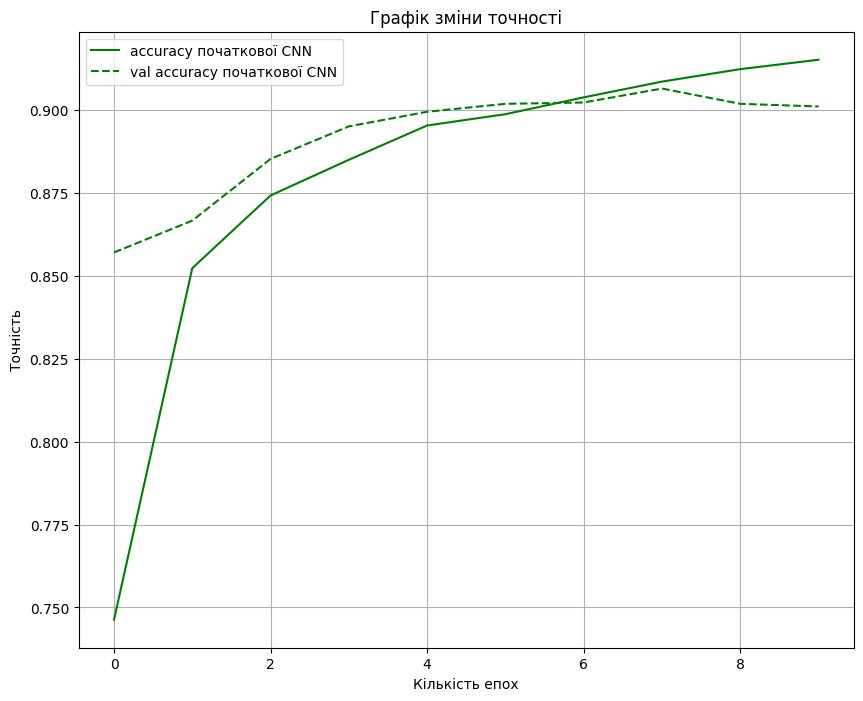

In [76]:
# Побудова графіків кривих навчання
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], color='green', label='accuracy початкової CNN')
plt.plot(history.history['val_accuracy'], color='orange', ls='--', label='val accuracy початкової CNN')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.legend(loc='upper left')
plt.grid()
plt.show()

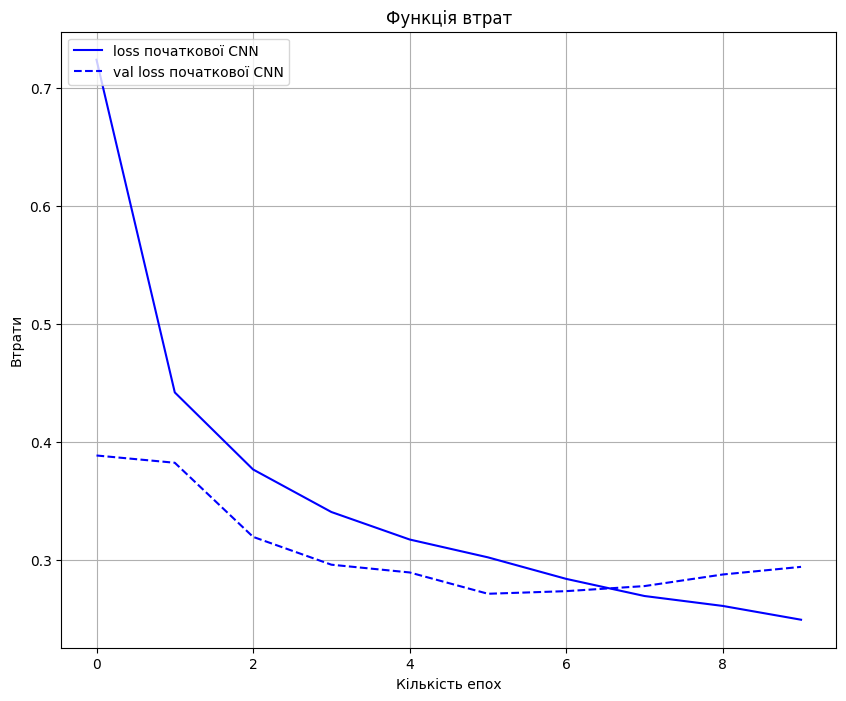

In [77]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], color='blue', label='loss початкової CNN')
plt.plot(history.history['val_loss'], color='red', ls='--', label='val loss початкової CNN')

plt.title('Функція втрат')
plt.ylabel('Втрати')
plt.xlabel('Кількість епох')
plt.grid()
plt.legend(loc='upper left')
plt.show()

In [78]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_55 (Conv2D)                   │ (None, 28, 28, 64)          │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_56 (Conv2D)                   │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_57 (Conv2D)                   │ (None, 14, 14, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_58 (Conv2D)                   │ (None, 7, 7, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_59 (Conv2D)                   │ (None, 7, 7, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_11 (Flatten)                 │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,241,505 (16.18 MB)

 Trainable params: 1,413,834 (5.39 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,827,671 (10.79 MB)

In [117]:
# спробуємо покращити нашу модель.
# спробуємо змінити ті гіперпараметри, які  показали найкращий результат в минулому ДЗ
# також оскільки спостерігається досить велике перенавчання введемо регулярізацію, на останньому шарі навіть L1 і L2, щоб трохи розрядить малозначащі ваги
# також введем шар BatchNormalization() він дозволяє вирішити проблему вибухового росту градієнтів. операція дозволяє взнати оптимальний масштаб і середне наступно вхідного шару,
# я к мінімум 1% ми отримаємо завдяки ньому як взналосяв процесі дослідження
model3 = keras.models.Sequential([
    #DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    #keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=256, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-4)),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4)),
    keras.layers.Dense(units=10, activation='softmax'),
])

In [118]:

model3.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history3 = model3.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8263 - loss: 0.5997 - val_accuracy: 0.8760 - val_loss: 0.4338
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9053 - loss: 0.3523 - val_accuracy: 0.9010 - val_loss: 0.3473
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9182 - loss: 0.3114 - val_accuracy: 0.9036 - val_loss: 0.3631
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9318 - loss: 0.2751 - val_accuracy: 0.9320 - val_loss: 0.2815
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9441 - loss: 0.2363 - val_accuracy: 0.9194 - val_loss: 0.3104
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9492 - loss: 0.2172 - val_accuracy: 0.9252 - val_loss: 0.2813
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9603 - loss: 0.1870 - val_accuracy: 0.9272 - val_loss: 0.2860
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9661 - loss: 0.1705 -

In [119]:
# подивимось чого досягнуто поточність та шо по втратам
score3 = model3.evaluate(X_test, y_test)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9219 - loss: 0.3430
Test loss: 0.33597853779792786
Test accuracy: 0.9218000173568726


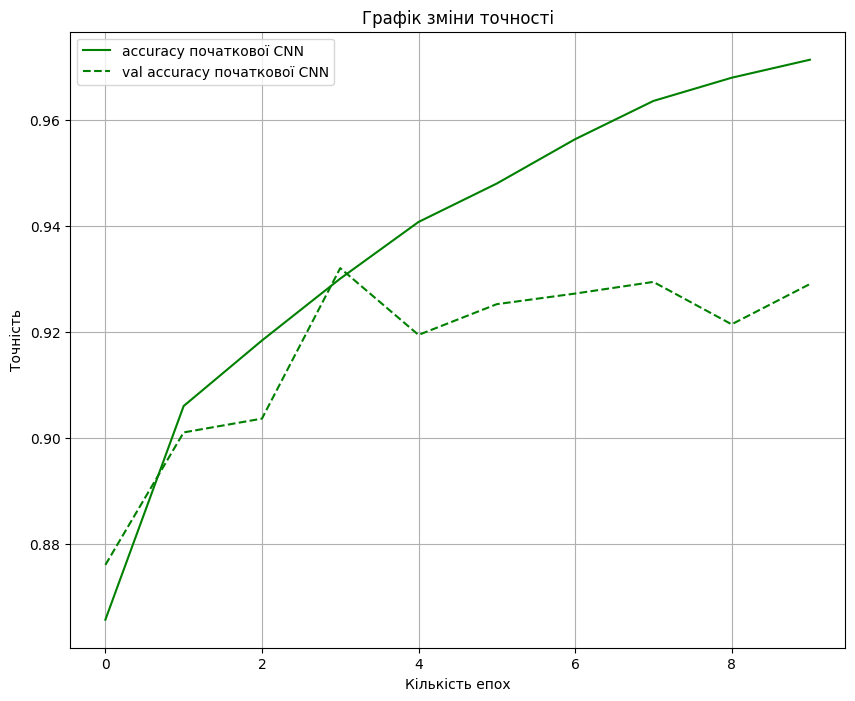

In [120]:
# Щож ми досягнули мети, отримавши точність більше 92% що більше ніж у варіанті з прошлого завдання
# Побудова графіків кривих навчання. аналізуючи їх бачимо що регулярізації можна додати ще, або хоча б ранню запинку
plt.figure(figsize=(8, 6))
plt.plot(history3.history['accuracy'], color='blue', label='accuracy покращеної CNN')
plt.plot(history3.history['val_accuracy'], color='red', ls='--', label='val accuracy покращеної CNN')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Частина 2

In [115]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [116]:
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]


X_train.shape, X_valid.shape, X_test.shape

((55000, 28, 28), (5000, 28, 28), (10000, 28, 28))

In [117]:
# Завантаження попередньо навченої моделі VGG16 (без верхніх шарів)
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
# Зверніть увагу: Fashion MNIST має зображення розміром 28x28,
# тому ми повинні змінити розмір вхідних даних та використовувати upsampling.

In [1]:
from PIL import Image
def resize_data(X):
    X_resized = []
    for image in X:
        image = Image.fromarray(image)
        image = image.resize((32, 32))
        image = np.array(image)
        X_resized.append(image)
    X_resized = np.array(X_resized)
    X_resized = np.repeat(X_resized[..., np.newaxis], 3, -1)
    return tf.keras.applications.vgg16.preprocess_input(X_resized)

In [119]:
# Add a third channel to the images and Preprocess the images
X_train_prepared = resize_data(X_train)
Y_train_prepared = tf.keras.utils.to_categorical(y_train, num_classes=10)
#
X_valid_prepared = resize_data(X_valid)
Y_valid_prepared = tf.keras.utils.to_categorical(y_valid, num_classes=10)

X_test_prepared = resize_data(X_test)
Y_test_prepared = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [120]:
# Заморожування шарів VGG16
base_model.trainable = False
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 2, 2, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 1, 1, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [121]:
# Створення нового класифікатора

from tensorflow.keras import layers, models

model_vgg = models.Sequential()
model_vgg.add(base_model)
model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model_vgg.add(keras.layers.Dense(units=256, activation='relu'))
model_vgg.add(layers.Dense(10, activation='softmax'))

In [122]:
model_vgg.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])


In [124]:
# проведемо навчання
history_vgg = model_vgg.fit(X_train_prepared, Y_train_prepared, epochs=10, validation_data=(X_valid_prepared, Y_valid_prepared))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7420 - loss: 1.0743 - val_accuracy: 0.8326 - val_loss: 0.4707
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8430 - loss: 0.4299 - val_accuracy: 0.8446 - val_loss: 0.4477
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8617 - loss: 0.3736 - val_accuracy: 0.8526 - val_loss: 0.4161
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8717 - loss: 0.3485 - val_accuracy: 0.8556 - val_loss: 0.4263
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8795 - loss: 0.3242 - val_accuracy: 0.8538 - val_loss: 0.4550
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8869 - loss: 0.2981 - val_accuracy: 0.8528 - val_loss: 0.4525
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8927 - loss: 0.2861 - val_accuracy: 0.8576 - val_loss: 0.4648
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8972 - loss: 0.2707 -

In [125]:
# подивимось чого досягнуто поточність та шо по втратам
score_vgg = model_vgg.evaluate(X_test_prepared, Y_test_prepared)
print('Test loss:', score_vgg[0])
print('Test accuracy:', score_vgg[1])
# точність в т.н. в такій коробочній реалізації бажає бути кращою

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8533 - loss: 0.5021
Test loss: 0.5080845952033997
Test accuracy: 0.8550000190734863


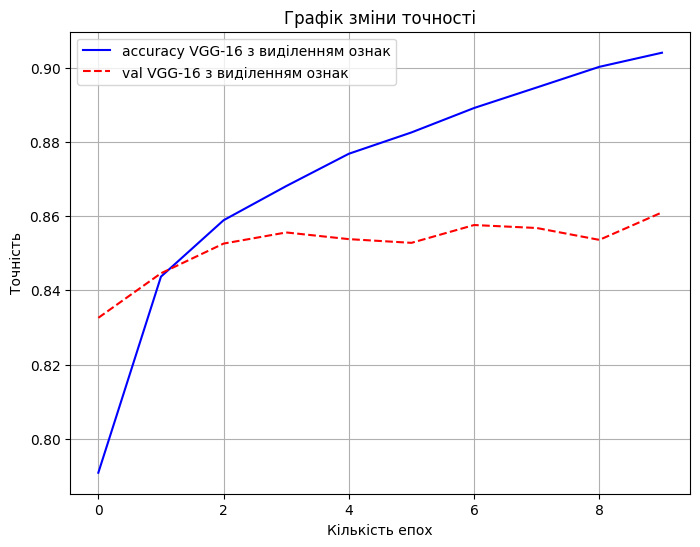

In [126]:
plt.figure(figsize=(8, 6))
plt.plot(history_vgg.history['accuracy'], color='blue', label='accuracy VGG-16 з виділенням ознак')
plt.plot(history_vgg.history['val_accuracy'], color='red', ls='--', label='val VGG-16 з виділенням ознак')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Донавчання

In [127]:
base_model2 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Використаємо збудовані навчальні, валідаційні і тестові виборки з попереднього прикладу
for layer in base_model2.layers:
    layer.trainable = False

In [128]:
# ще раз подивимось на склад мережі і підразморозимо деякі верхні шари
base_model2.layers

[<InputLayer name=input_layer_18, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [129]:
for layer in base_model2.layers[-4:]:
    layer.trainable = True

In [130]:
# Створення нового класифікатора

# from tensorflow.keras import layers, models

model_vgg_2 = models.Sequential()
model_vgg_2.add(base_model2)
model_vgg_2.add(layers.Flatten())
model_vgg_2.add(layers.Dense(256, activation='relu'))
model_vgg_2.add(layers.Dropout(0.5))
model_vgg_2.add(layers.Dense(10, activation='softmax'))

In [131]:
model_vgg_2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [132]:
history_vgg_2 = model_vgg_2.fit(X_train_prepared, Y_train_prepared, epochs=10, validation_data=(X_valid_prepared, Y_valid_prepared))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.1001 - loss: 2.6787 - val_accuracy: 0.1042 - val_loss: 2.3030
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0963 - loss: 2.3028 - val_accuracy: 0.0900 - val_loss: 2.3030
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1008 - loss: 2.3027 - val_accuracy: 0.0934 - val_loss: 2.3032
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0980 - loss: 2.3028 - val_accuracy: 0.0900 - val_loss: 2.3029
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0987 - loss: 2.3027 - val_accuracy: 0.0934 - val_loss: 2.3028
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1012 - loss: 2.3026 - val_accuracy: 0.0980 - val_loss: 2.3025
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1010 - loss: 2.3028 - val_accuracy: 0.0934 - val_loss: 2.3030
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1002 - loss: 2.3027 -

In [133]:
print(history_vgg_2)

In [134]:
# подивимось чого досягнуто поточність та шо по втратам
score_vgg_2 = model_vgg_2.evaluate(X_test_prepared, Y_test_prepared)
print('Test loss:', score_vgg_2[0])
print('Test accuracy:', score_vgg_2[1])
# точність в т.н. в такій коробочній реалізації бажає бути кращою

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1001 - loss: 2.3026
Test loss: 2.3026106357574463
Test accuracy: 0.10000000149011612


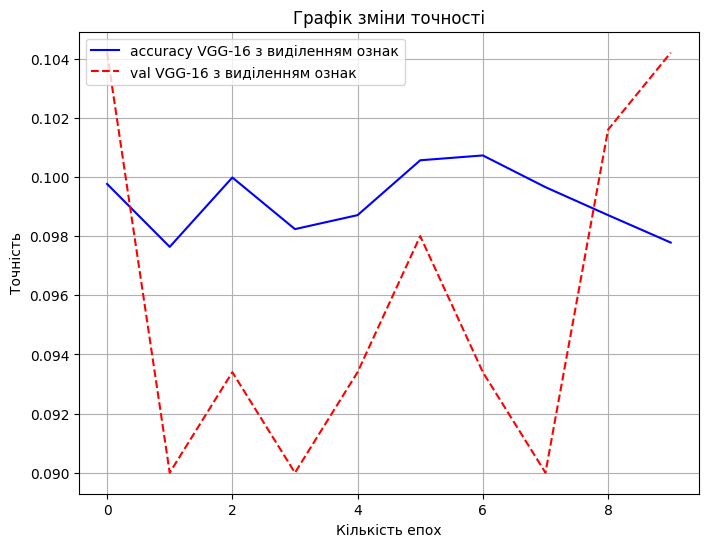

In [135]:
plt.figure(figsize=(8, 6))
plt.plot(history_vgg_2.history['accuracy'], color='blue', label='accuracy VGG-16 з виділенням ознак')
plt.plot(history_vgg_2.history['val_accuracy'], color='red', ls='--', label='val VGG-16 з виділенням ознак')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [145]:
# змінимо підхід, заморозимо ваги попередньо начаних шарів на початку навчання, створимо для поріняння ще одну модель
# Використаємо збудовані навчальні, валідаційні і тестові виборки з попереднього прикладу

base_model3 = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


for layer in base_model3.layers:
    layer.trainable = False



In [146]:
# Додамо у цю модель найкращі параметри і структуру з попередніх дослідів
model_vgg_3 = models.Sequential()
model_vgg_3.add(base_model3)
model_vgg_3.add(layers.Flatten())
model_vgg_3.add(keras.layers.Dense(units=256, activation='relu', kernel_regularizer=keras.regularizers.L2(l2=1e-4))),
model_vgg_3.add(keras.layers.BatchNormalization()),
model_vgg_3.add(keras.layers.Dense(units=512, activation='relu', kernel_regularizer=keras.regularizers.L1L2(l1=1e-5, l2=1e-4))),
model_vgg_3.add(layers.Dense(10, activation='softmax'))


In [147]:
model_vgg_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [148]:
# для початку візьмемо 3 епохи
history_vgg_3_p1 = model_vgg_3.fit(X_train_prepared, Y_train_prepared, epochs=3, validation_data=(X_valid_prepared, Y_valid_prepared))

1702/1719 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7848 - loss: 0.7263

InternalError: Graph execution error:

Detected at node StatefulPartitionedCall defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-148-b7f54a9a27e4>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 318, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

ptxas exited with non-zero error code 2, output: : If the error message indicates that a file could not be written, please verify that sufficient filesystem space is provided.
	 [[{{node StatefulPartitionedCall}}]] [Op:__inference_one_step_on_iterator_659192]

In [149]:
# нажаль періодично вибиває помилку файлової системи, невідомо як її пофіксить, так же таємничо воно зникає, але продовжимо і досягнем мети
# розморозимо тепер всі шари і натренуємо модель
for layer in base_model3.layers:
    layer.trainable = True

model_vgg_3.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [150]:
history_vgg_3_p2 = model_vgg_3.fit(X_train_prepared, Y_train_prepared, epochs=10, validation_data=(X_valid_prepared, Y_valid_prepared))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - accuracy: 0.7015 - loss: 0.8463 - val_accuracy: 0.8548 - val_loss: 935.9946
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8845 - loss: 0.3753 - val_accuracy: 0.8992 - val_loss: 0.3359
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9026 - loss: 0.3089 - val_accuracy: 0.8864 - val_loss: 0.3940
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9200 - loss: 0.2559 - val_accuracy: 0.9014 - val_loss: 0.3002
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9287 - loss: 0.2288 - val_accuracy: 0.9262 - val_loss: 0.2524
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9421 - loss: 0.1904 - val_accuracy: 0.8890 - val_loss: 0.3143
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9503 - loss: 0.1618 - val_accuracy: 0.9270 - val_loss: 0.2535
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.9587 - loss:

In [151]:
# подивимось чого досягнуто поточність та шо по втратам
score_vgg_3 = model_vgg_3.evaluate(X_test_prepared, Y_test_prepared)
print('Test loss:', score_vgg_3[0])
print('Test accuracy:', score_vgg_3[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9214 - loss: 0.3087
Test loss: 0.35631412267684937
Test accuracy: 0.925000011920929


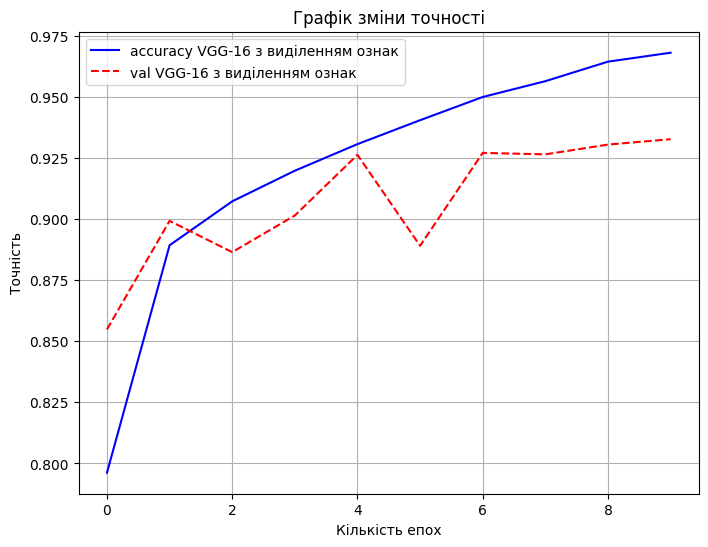

In [152]:
plt.figure(figsize=(8, 6))
plt.plot(history_vgg_3_p2.history['accuracy'], color='blue', label='accuracy VGG-16 з виділенням ознак')
plt.plot(history_vgg_3_p2.history['val_accuracy'], color='red', ls='--', label='val VGG-16 з виділенням ознак')
plt.title('Графік зміни точності')
plt.ylabel('Точність')
plt.xlabel('Кількість епох')
plt.legend(loc='upper left')
plt.grid()
plt.show()

Останній спосіб дав вже більш менш пристойні результати Test accuracy: 0.925
це найкращий результат по всім виборкам
можно зробити висновок що метод донавчання з правильно підібраними гіперпараметрами і будовою верхніх повнозвязних шарів дають кращий результат ніж базова CNN/
Також вона дає білше точності ніж багатошарова мережа з попереднього завдання.